<a href="https://colab.research.google.com/github/fneaplle/VAE/blob/main/multivariate_generative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import tensorflow as tf
from scipy.stats import multivariate_normal

In [123]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [124]:
ds = []
for i in range(60000):
  if train_labels[i] == 1:
    ds.append(train_images[i][np.newaxis,...])

In [125]:
ds = np.concatenate(ds, axis=0)

In [126]:
ds.shape

(6742, 28, 28, 1)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(ds[0][:,:,0], cmap='gray')

In [130]:
X=np.array(tf.keras.layers.Flatten()(ds))

In [131]:
mu = np.average(X, axis=0)
cov = np.cov(X, rowvar=False)
rv = multivariate_normal(mu, cov, allow_singular=True)

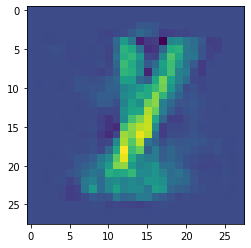

In [135]:
sample = rv.rvs()
plt.imshow(sample.reshape((28,28)))